In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier , StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
dataset = pd.read_csv('./Employee_Attrition.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [55]:
dataset.duplicated().sum()

0

In [56]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [57]:
pd.set_option('display.max_columns',None)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [58]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [59]:
unique_value = [col for col in dataset.columns if len(dataset[col].unique()) == 1]
print(unique_value)

['EmployeeCount', 'Over18', 'StandardHours']


In [60]:
dataset = dataset.drop(columns=unique_value, axis=1)
dataset = dataset.drop(columns=["EmployeeNumber"], axis=1)
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

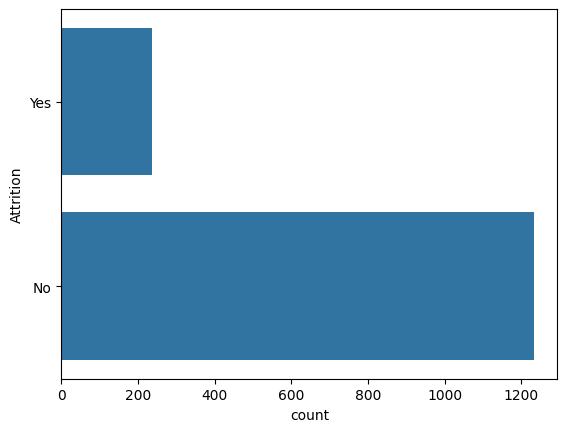

In [61]:
sns.countplot(dataset['Attrition'])
plt.show()

### Business travel on Attrition

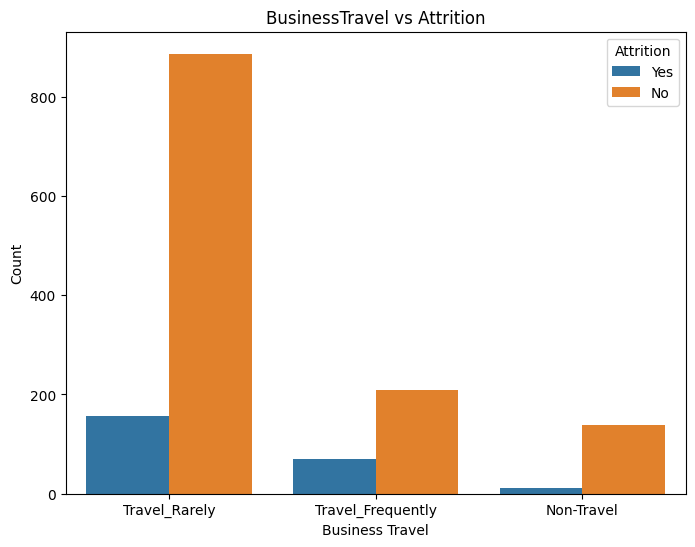

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=dataset)
plt.title('BusinessTravel vs Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### Attrition rate in Department

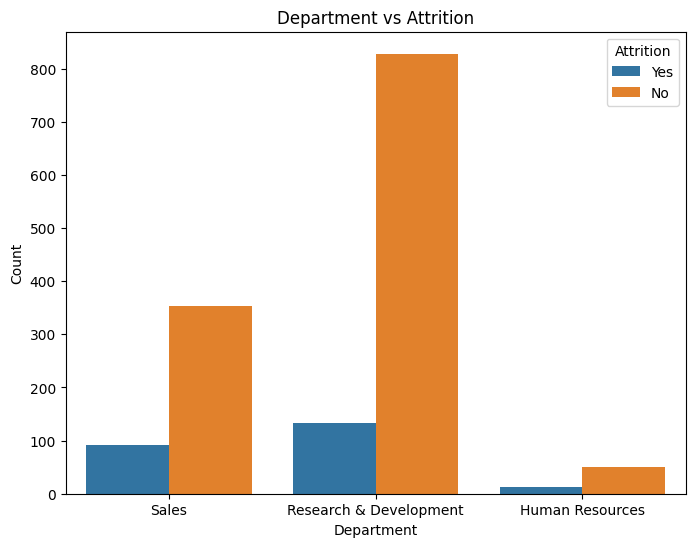

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.title('Department vs Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### Education field

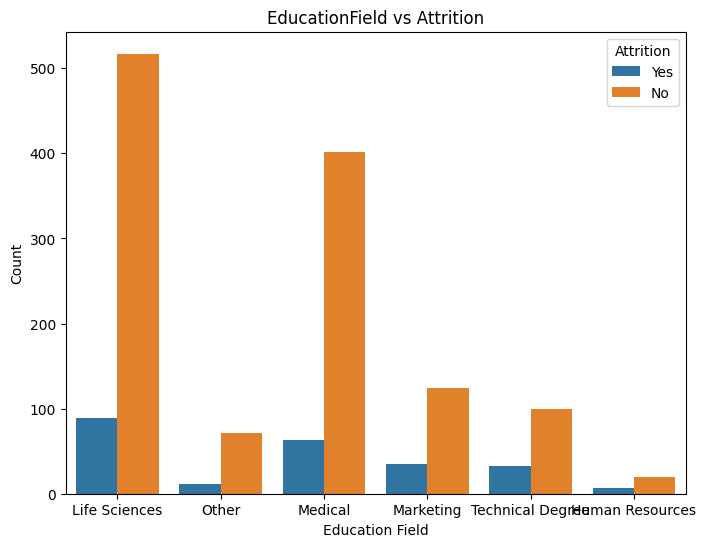

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='EducationField', hue='Attrition', data=dataset)
plt.title('EducationField vs Attrition')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### Gender

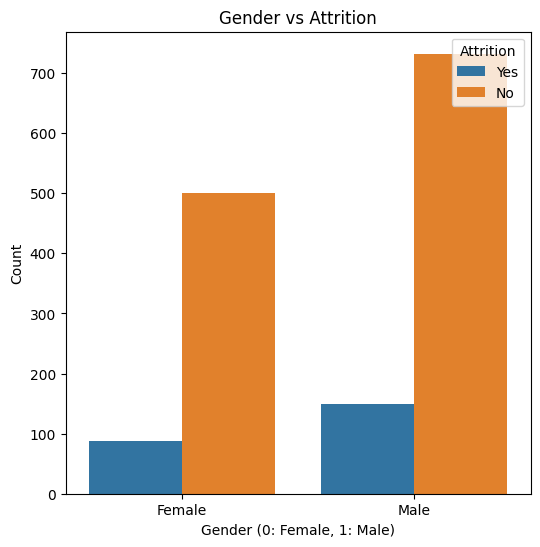

In [65]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Attrition', data=dataset)
plt.title('Gender vs Attrition')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### Overtime

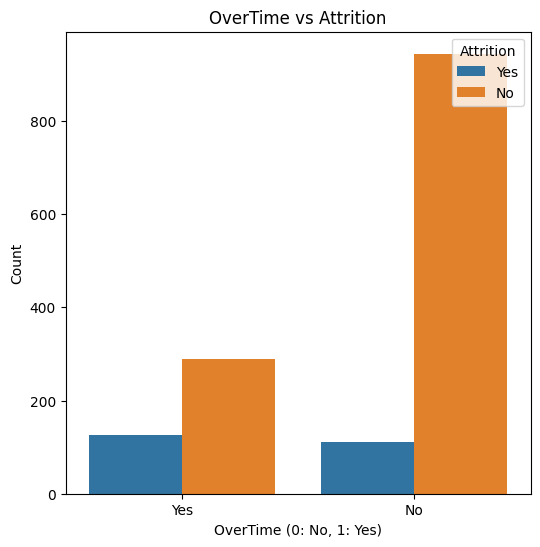

In [66]:
plt.figure(figsize=(6, 6))
sns.countplot(x='OverTime', hue='Attrition', data=dataset)
plt.title('OverTime vs Attrition')
plt.xlabel('OverTime (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### Job role

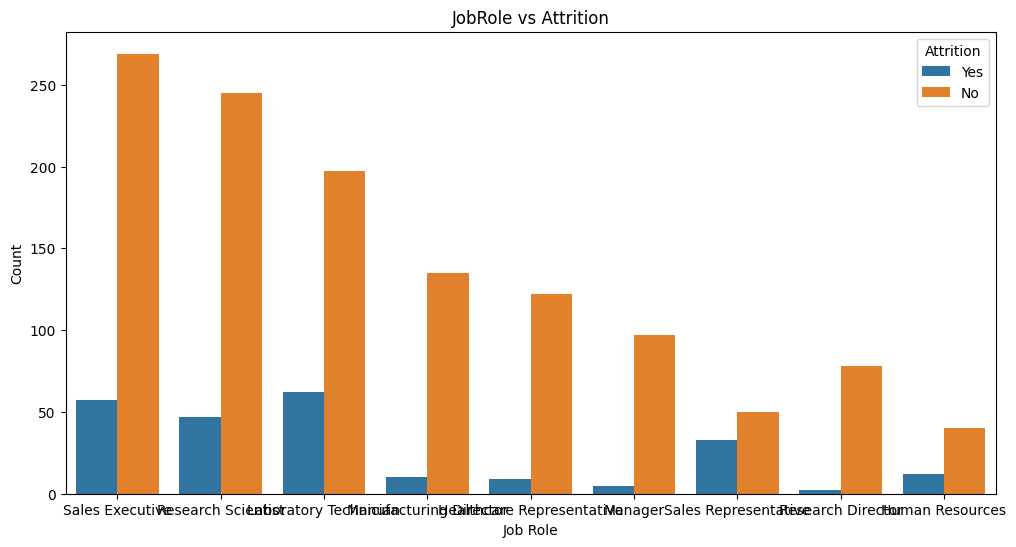

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=dataset)
plt.title('JobRole vs Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

### MaritalStatus

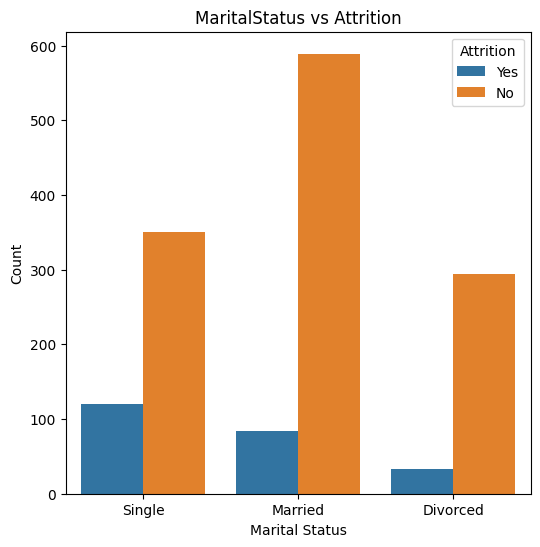

In [68]:
plt.figure(figsize=(6, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=dataset)
plt.title('MaritalStatus vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

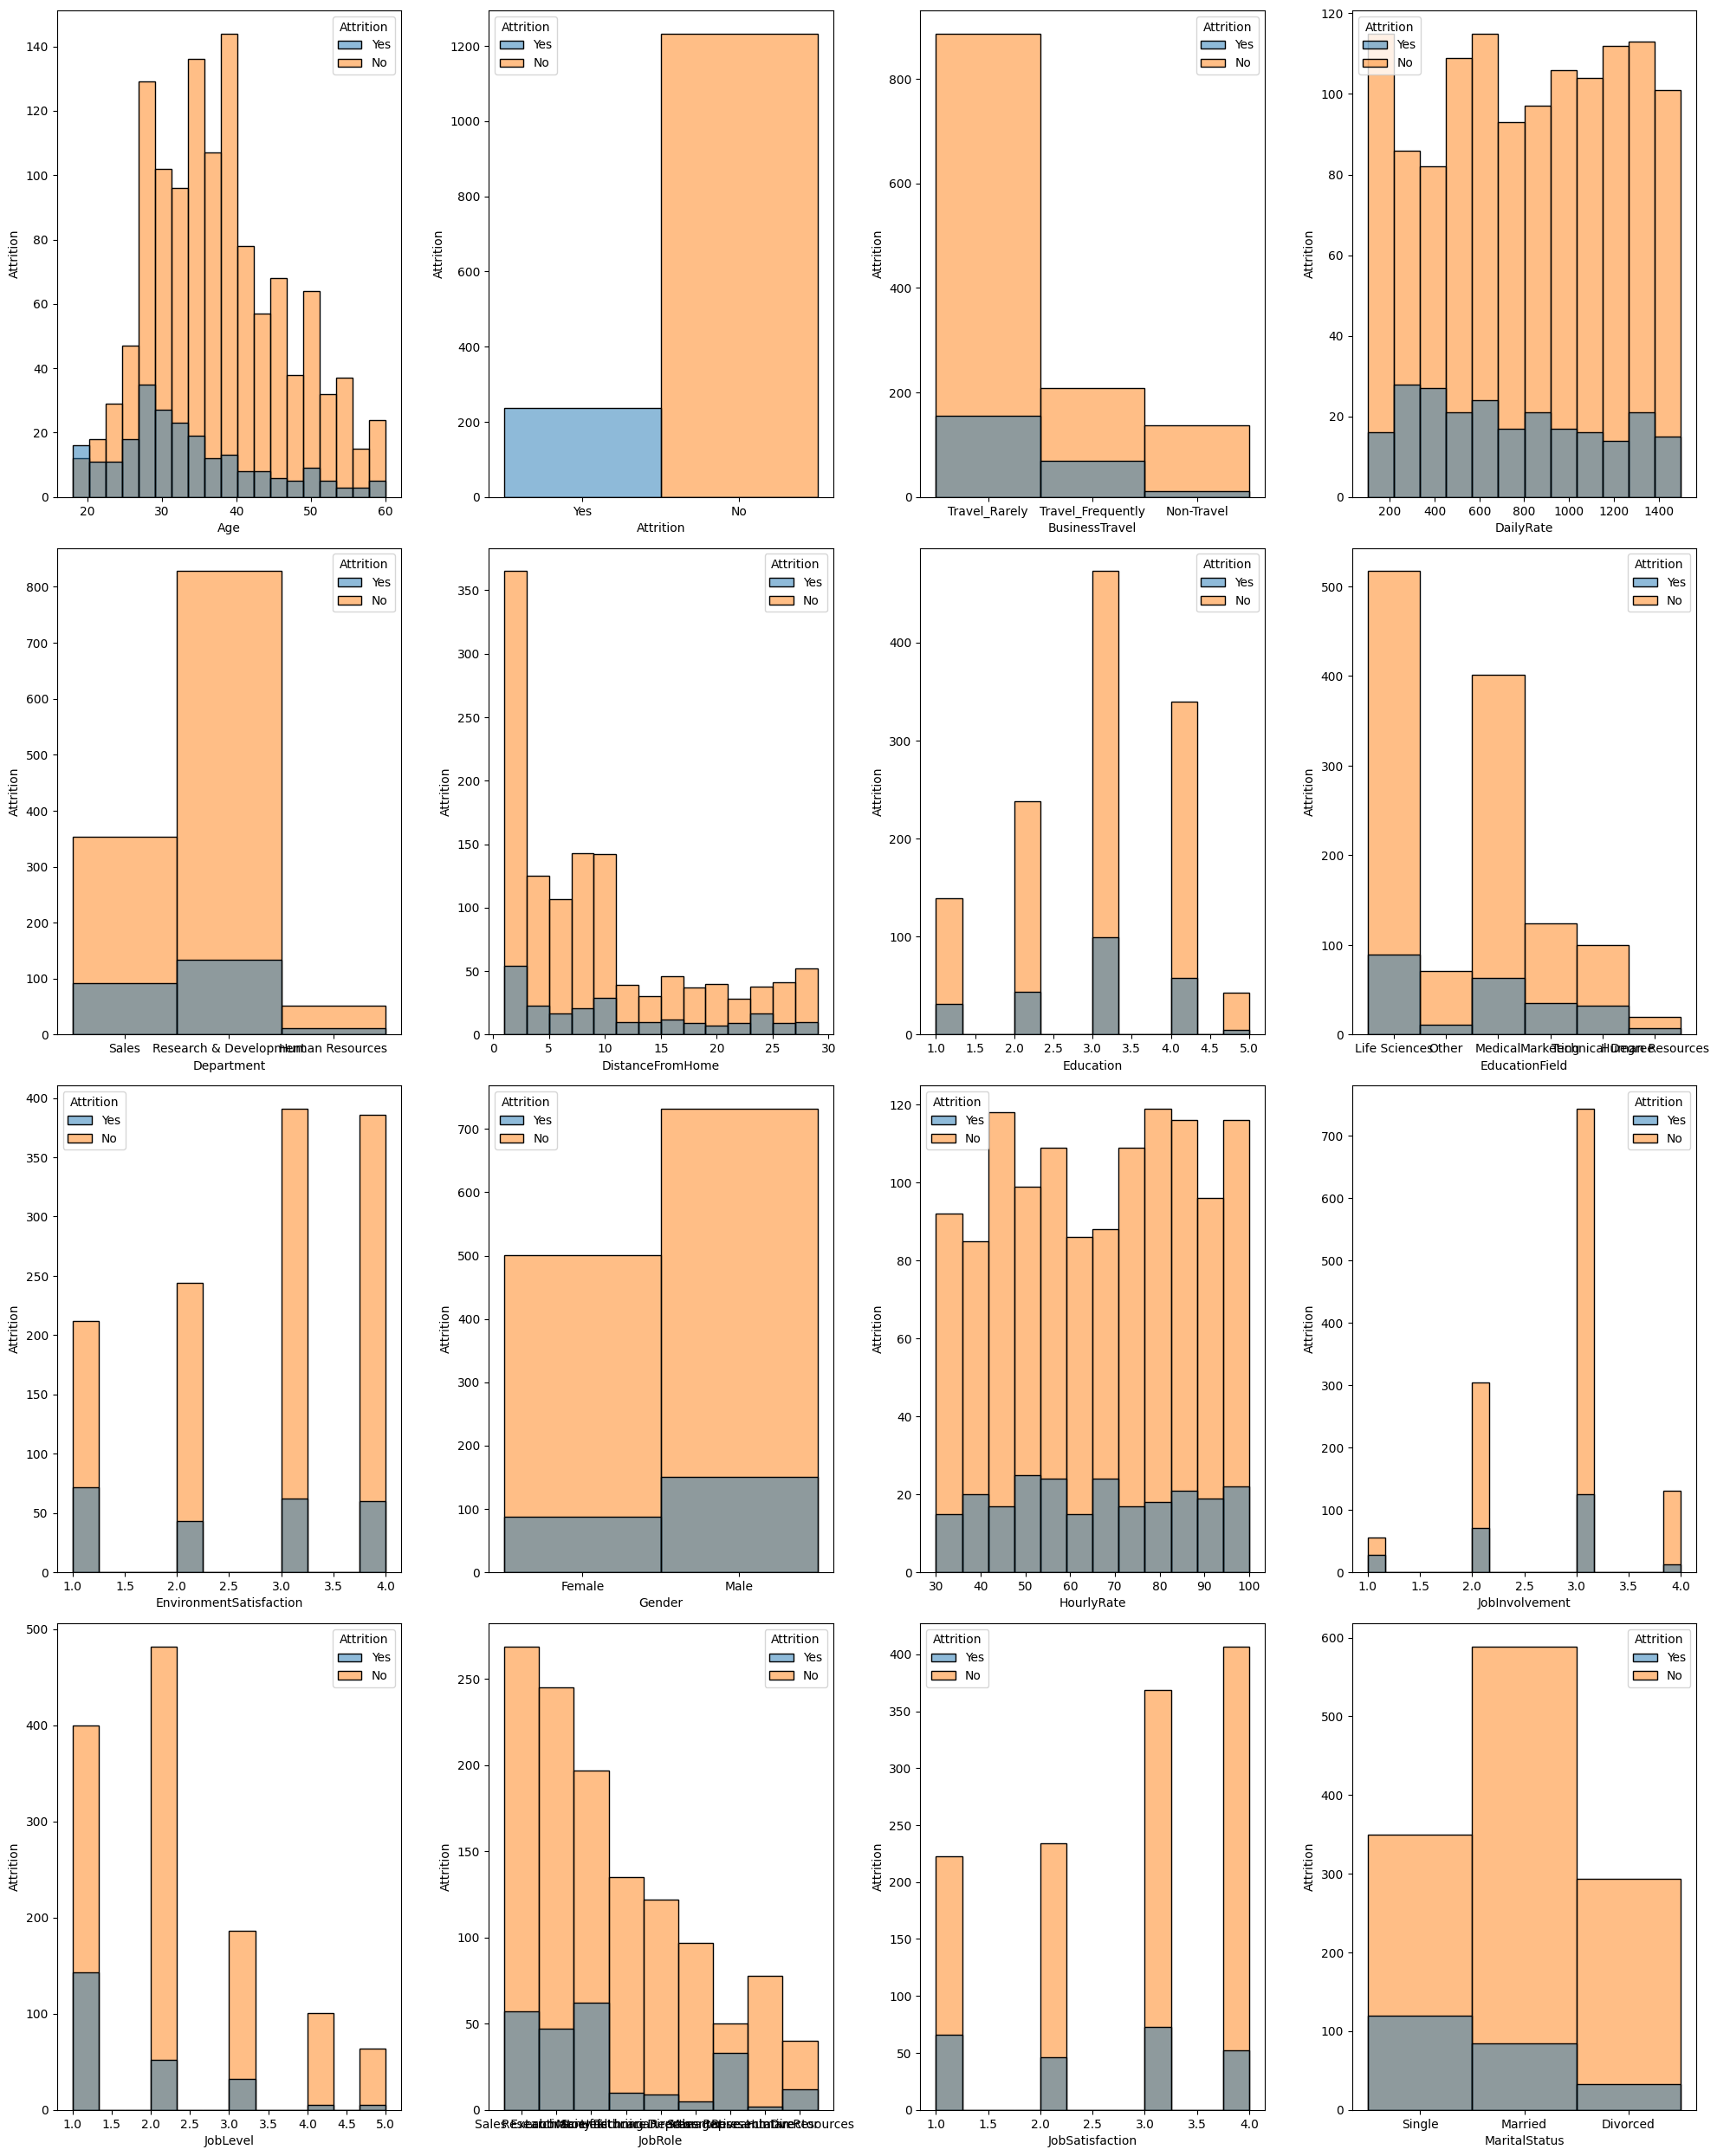

In [69]:
plt.figure(figsize=(20,25),facecolor='white')
count=1

for col in dataset.columns:
    if count<= 16:
        ax = plt.subplot(4,4,count)
        sns.histplot(x=dataset[col].dropna(axis=0),hue=dataset.Attrition)
        plt.xlabel(col)
        plt.ylabel("Attrition")
        count+=1
plt.tight_layout()

In [70]:
# define list for numeric and categorical variables
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

numeric_columns, categorical_columns

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object'))

In [71]:
#Ordinal columns in dataset
ordinal_columns = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                   'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
dataset[ordinal_columns].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [72]:
np.unique(dataset['Education'])

array([1, 2, 3, 4, 5], dtype=int64)

In [73]:
#Encoding of Target variable
dataset['Attrition']=dataset['Attrition'].replace({'Yes':1,'No':0})

C:\Users\lohit.DESKTOP-57KU0RV\AppData\Local\Temp\ipykernel_8240\1868480424.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Attrition']=dataset['Attrition'].replace({'Yes':1,'No':0})


In [74]:
dataset['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [75]:
#Encode Binary variable
dataset['OverTime']=dataset['OverTime'].map({'Yes':1,'No':0})
dataset['Gender']=dataset['Gender'].map({'Male':1,'Female':0})

In [76]:
dataset['OverTime'].head()

0    1
1    0
2    1
3    1
4    0
Name: OverTime, dtype: int64

In [77]:
dataset['Gender'].head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [78]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
encoder={}
for cols in encoding_cols:
    encoder[cols]=LabelEncoder()
    dataset[cols]=encoder[cols].fit_transform(dataset[cols])

In [79]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


<Axes: >

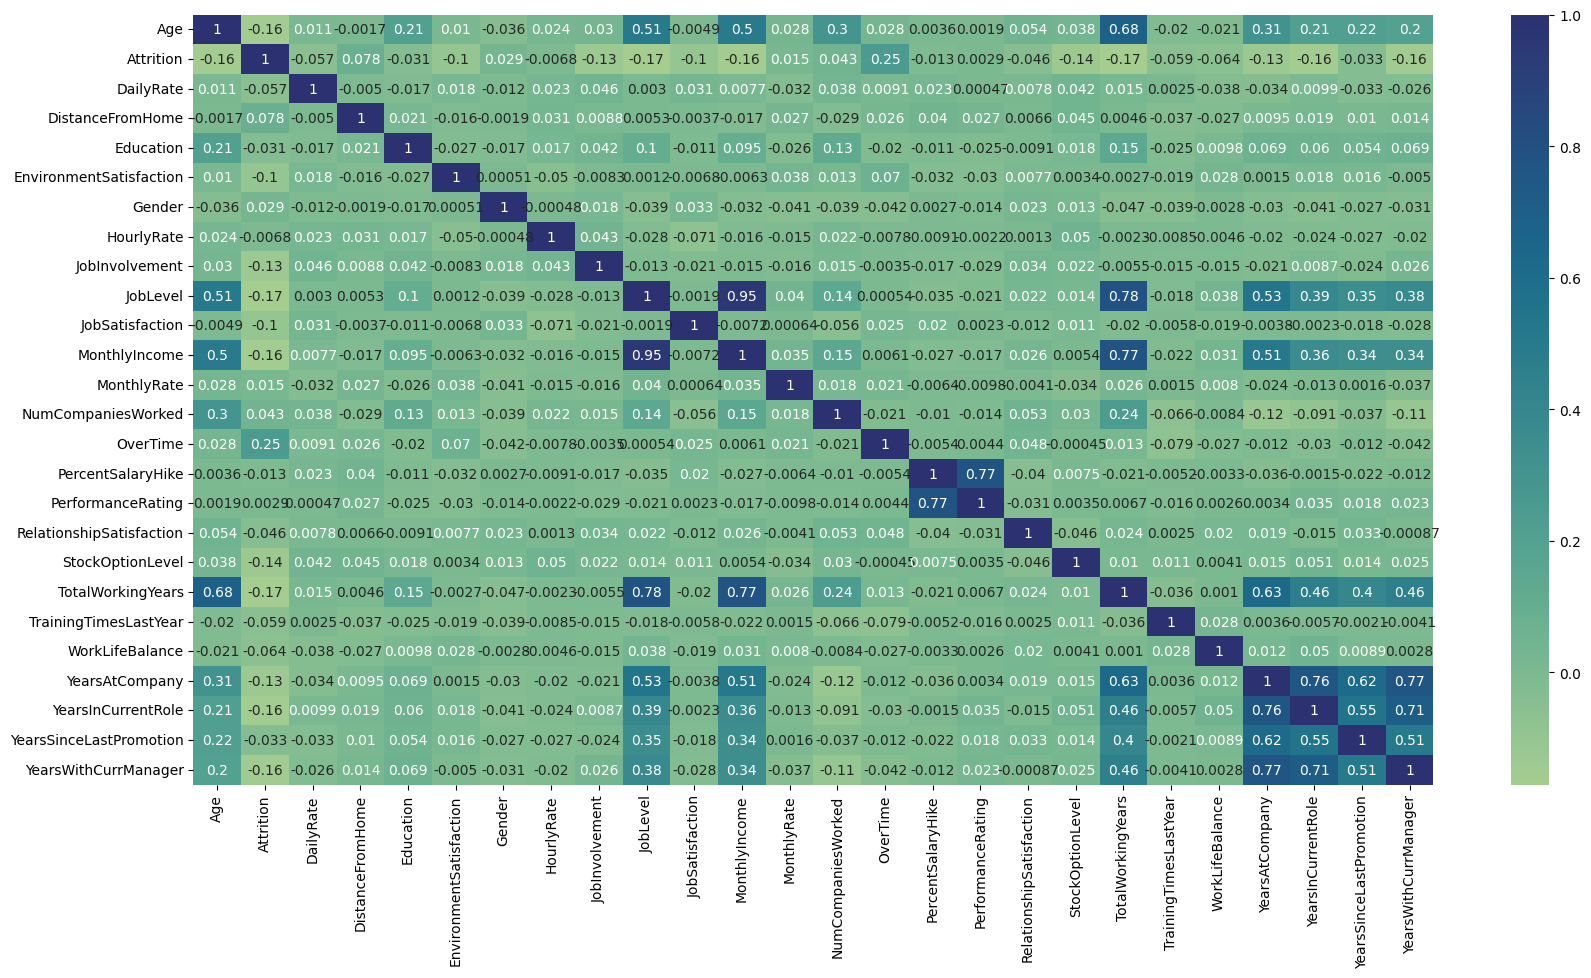

In [105]:
#Correlation Matrix
corr_matrix = dataset.select_dtypes(include=['int64']).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap="crest", annot=True,)

In [81]:
attrition_correlations = corr_matrix['Attrition'].drop('Attrition')
attrition_correlations

Age                        -0.159205
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
Y

In [82]:
#Assigning Independent and Dependent variables
X = dataset.drop(['Attrition'],axis=1)
y = dataset['Attrition'].values

In [83]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [84]:
# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Apply RandomOverSampler to handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [88]:
# Define preprocessing steps for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error, classification_report

### Feature Selection

In [ ]:
# Selects most significant 10 features, change the n_features_to_select=10 as per requirement
# rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rfe = RFE(estimator=rfe_model, n_features_to_select=10)
# X_train_rfecv = rfe.fit_transform(X_train, y_train)
# X_test_rfecv = rfe.transform(X_test)

In [90]:
# Apply RFECV for feature selection with Cross-Validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rfe_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
X_train_rfecv = rfecv.fit_transform(X_train, y_train)
X_test_rfecv = rfecv.transform(X_test)

# Print the number of features selected
print(f"Number of features selected: {rfecv.n_features_}")

# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features.tolist())

Number of features selected: 30
Selected Features: ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [91]:
#function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

### Logistic Regression

In [92]:
# Evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: LogisticRegression
Accuracy: 0.7692307692307693
Mean Absolute Error (MAE): 0.23076923076923078
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       247
           1       0.75      0.81      0.78       247

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494



### KNeighbors Classifier

In [93]:
# Evaluate K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=1)
evaluate_model(knn, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: KNeighborsClassifier
Accuracy: 0.9352226720647774
Mean Absolute Error (MAE): 0.06477732793522267
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       247
           1       0.89      0.99      0.94       247

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



### Decision Tree

In [94]:
# Evaluate Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
evaluate_model(dec_tree, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.9271255060728745
Mean Absolute Error (MAE): 0.0728744939271255
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92       247
           1       0.88      0.99      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



### SVM

In [95]:
# Evaluate Support Vector Classifier (SVC)
svc = SVC(random_state=42)
evaluate_model(svc, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: SVC
Accuracy: 0.917004048582996
Mean Absolute Error (MAE): 0.08299595141700405
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       247
           1       0.89      0.95      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



### Random Forest

In [96]:
# Evaluate Random Forest
random_forest = RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
evaluate_model(random_forest, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: RandomForestClassifier
Accuracy: 0.9352226720647774
Mean Absolute Error (MAE): 0.06477732793522267
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       247
           1       0.89      0.99      0.94       247

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



### ExtraTrees

In [97]:
# Evaluate Extra Trees
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15, bootstrap=True)
evaluate_model(extra_trees, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: ExtraTreesClassifier
Accuracy: 0.9433198380566802
Mean Absolute Error (MAE): 0.05668016194331984
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       247
           1       0.92      0.97      0.94       247

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



### AdaBoost

In [98]:
# Evaluate AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
evaluate_model(adaboost, X_train_rfecv, y_train, X_test_rfecv, y_test)

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Accuracy: 0.840080971659919
Mean Absolute Error (MAE): 0.15991902834008098
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       247
           1       0.82      0.88      0.85       247

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



### Gradient Boost

In [99]:
# Evaluate Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=800)
evaluate_model(gradient_boosting, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: GradientBoostingClassifier
Accuracy: 0.937246963562753
Mean Absolute Error (MAE): 0.06275303643724696
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93       247
           1       0.90      0.99      0.94       247

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



### XGBoost

In [100]:
# Evaluate XGBoost
xgboost = XGBClassifier(n_estimators=45,max_depth=5,learning_rate=0.5)
evaluate_model(xgboost, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: XGBClassifier
Accuracy: 0.9615384615384616
Mean Absolute Error (MAE): 0.038461538461538464
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       247
           1       0.94      0.99      0.96       247

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



### VotingClassifier

In [101]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('knn', knn),
    ('svc', svc),
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting)
], voting='hard')
evaluate_model(voting_clf, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: VotingClassifier
Accuracy: 0.951417004048583
Mean Absolute Error (MAE): 0.048582995951417005
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       247
           1       0.92      0.99      0.95       247

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



### Stacking

In [102]:
# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('log_reg', log_reg),
    ('knn', knn),
    ('svc', svc),
    ('random_forest', random_forest)
], final_estimator=GradientBoostingClassifier(random_state=42))
evaluate_model(stacking_clf, X_train_rfecv, y_train, X_test_rfecv, y_test)

Model: StackingClassifier
Accuracy: 0.9736842105263158
Mean Absolute Error (MAE): 0.02631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       247
           1       0.97      0.98      0.97       247

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



### Exporting the Model

In [104]:
import joblib

# Define a list of models to evaluate
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    KNeighborsClassifier(n_neighbors=1),
    DecisionTreeClassifier(random_state=42),
    SVC(random_state=42),
    RandomForestClassifier(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15),
    GradientBoostingClassifier(n_estimators=800),
    AdaBoostClassifier(n_estimators=100,learning_rate=1.0),
    ExtraTreesClassifier(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15, bootstrap=True),
    XGBClassifier(n_estimators=45,max_depth=5,learning_rate=0.5)
]

# Dictionary to store model performance
model_performance = {}

# Helper function to evaluate models and store performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model.__class__.__name__] = accuracy
    return model

# Evaluate each model and keep track of the best one
best_model = None
best_accuracy = 0

for model in models:
    trained_model = evaluate_model(model, X_train_rfecv, y_train, X_test_rfecv, y_test)
    accuracy = model_performance[model.__class__.__name__]
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = trained_model

# Print the best model
print(f"Best Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy}")

# Save the best model to a file
best_model_filename = 'ibm_pipe.pkl'
joblib.dump(best_model, best_model_filename)

# Save the selected features to a file
selected_features_filename = 'ibm_dataset.pkl'
selected_features = X.columns[rfecv.support_]
joblib.dump(selected_features, selected_features_filename)

print(f"Best model saved as {best_model_filename}")
print(f"Selected features saved as {selected_features_filename}")

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Model: XGBClassifier with Accuracy: 0.9615384615384616
Best model saved as ibm_pipe.pkl
Selected features saved as ibm_dataset.pkl
